In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import h5py

filepath='/home/casparl/NKI/saraGAN/SURFGAN_3D/runs/pgan/20210311_102301/generated_images/fake_images_4.npy'
fake_images = np.load(filepath)

filepath_real='/nfs/radioct/14_pgan/npy/average/128x128.h5py'
f = h5py.File(filepath_real, 'r')

filepath_real='/nfs/radioct/14_pgan/npy/average/512x512.h5py'
f_fullres = h5py.File(filepath_real, 'r')

print(f'min: {np.min(fake_images)}, max: {np.max(fake_images)}')
fake_images.shape

min: -408.3663330078125, max: 3162.771728515625


(100, 1, 40, 128, 128)

**Run of deeppgan, phase 4**

In [3]:
import numpy as np
import h5py

filepath='/home/casparl/NKI/saraGAN/SURFGAN_3D/runs/pgandeep/20210423_214220/generated_images/fake_images_4.npy'
fake_images = np.load(filepath)

filepath_real='/nfs/radioct/14_pgan/npy/average/128x128.h5py'
f = h5py.File(filepath_real, 'r')

print(f'min: {np.min(fake_images)}, max: {np.max(fake_images)}')
fake_images.shape

min: -611.83935546875, max: 3498.176513671875


(100, 1, 40, 128, 128)

**Run of deeppgan, phase 5**

In [4]:
import numpy as np
import h5py

filepath='/home/casparl/NKI/saraGAN/SURFGAN_3D/runs/pgandeep/20210507_194700/generated_images/fake_images_5.npy'
fake_images = np.load(filepath)

filepath_real='/nfs/radioct/14_pgan/npy/average/256x256.h5py'
f = h5py.File(filepath_real, 'r')

print(f'min: {np.min(fake_images)}, max: {np.max(fake_images)}')
fake_images.shape

min: -576.6021728515625, max: 3339.908447265625


(100, 1, 80, 256, 256)

In [6]:
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

def get_image(arr, i):
    return arr[i,0,...]

def get_real_image(hdf5_file, i):
    return f[list(f.keys())[i]]

def display_image(image,j):
    plt.imshow(image[j,:,:], cmap='gray', interpolation='None')
    
def disp_im(i,j,window,level):
    fig, ax = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
    ax[0].imshow(fake_images[i,0,j,...], cmap='gray', interpolation='None', vmin=1024+level-(window/2), vmax=1024+level+(window/2))
    ax[1].imshow(f[list(f.keys())[i]][j,...], cmap='gray', interpolation='None', vmin=1024+level-(window/2), vmax=1024+level+(window/2))
    
def find_closest(fake, real_h5py_file):
    mse = []
    fake=np.asarray(fake)
    for key in list(real_h5py_file.keys()):
        real=np.asarray(real_h5py_file[key])
        mse_cur = ((fake-real)**2).mean()
        mse.append(mse_cur)
        #print(mse_cur)
    mse=np.asarray(mse)
    min_arg = np.argmin(mse)
    return min_arg, mse[min_arg], mse

def get_closest(real_h5py_file, min_arg):
    return real_h5py_file[list(real_h5py_file.keys())[min_arg]]

In [34]:
get_closest(f, 2453)[4,...]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [5]:
import time
fake_index = 1
start = time.time()
min_arg, min_mse, mse = find_closest(fake_images[fake_index,0,...], f)
end = time.time()
print(f'Finding minimum mse took: {end-start}s')
print(f'Image {min_arg} resulted in the lowest mse {min_mse}')

def disp_closest(j):
    fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
    ax[0].imshow(fake_images[fake_index,0,j,...], cmap='gray', interpolation='None', vmin=0, vmax=1500)
    ax[1].imshow(get_closest(f, min_arg)[j,...], cmap='gray', interpolation='None', vmin=0, vmax=1500)
    
interact(disp_closest,j=widgets.IntSlider(min=0,max=fake_images.shape[2]-1))

Finding minimum mse took: 21.971521615982056s
Image 252 resulted in the lowest mse 25109.421875


interactive(children=(IntSlider(value=0, description='j', max=39), Output()), _dom_classes=('widget-interact',…

<function __main__.disp_closest(j)>

In [5]:
im1 = get_image(fake_images,1)
print(f'min: {np.min(im1)}, max: {np.max(im1)}')
print(im1[0:10,0:10])
print(im1[50:60,50:60])

min: -357.1201171875, max: 2001.08837890625
[[[ -1.2781982  -16.692383     2.121521   ...  27.011597    -2.9107666
    -5.8236084 ]
  [ 17.945435   -17.654785    10.220764   ...   6.866455     9.141418
    -8.228882  ]
  [ -9.746826   -11.297852     5.595337   ...   4.0270386    5.6293335
    -1.4591064 ]
  ...
  [ -2.7285156  -10.120361     1.8440552  ...  -5.123169     1.6105347
    -7.1745605 ]
  [ -3.09021     -9.755127     1.1870728  ...  -6.381836     0.93792725
    -7.489624  ]
  [ -2.3446045   -9.875366     0.92523193 ...  -5.1433105    1.6966553
    -6.4780273 ]]

 [[ 20.968872    -8.033447     1.0338135  ... -13.176636    -5.829956
   -29.428467  ]
  [-28.223755    -6.340332    -4.7911377  ...  -3.0700684    1.961731
    -1.7496338 ]
  [-14.091431     1.4745483    4.5648804  ...   1.6947021    4.067383
    -5.8446045 ]
  ...
  [ -5.020874    -2.3552246    4.0754395  ...   1.7781982    3.076477
    -7.510376  ]
  [ -5.3758545   -2.6230469    3.8452148  ...   1.2618408    3.337

In [8]:
interact(disp_im,i=widgets.IntSlider(min=0,max=fake_images.shape[0]-1),j=widgets.IntSlider(min=0,max=fake_images.shape[2]-1),window=widgets.IntSlider(value=1500, min=0,max=2048),level=widgets.IntSlider(value=-600, min=-1024,max=1024))

interactive(children=(IntSlider(value=0, description='i', max=99), IntSlider(value=0, description='j', max=79)…

<function __main__.disp_im(i, j, window, level)>

### Histogram of fake imaged compared to closest real image

<IPython.core.display.Javascript object>


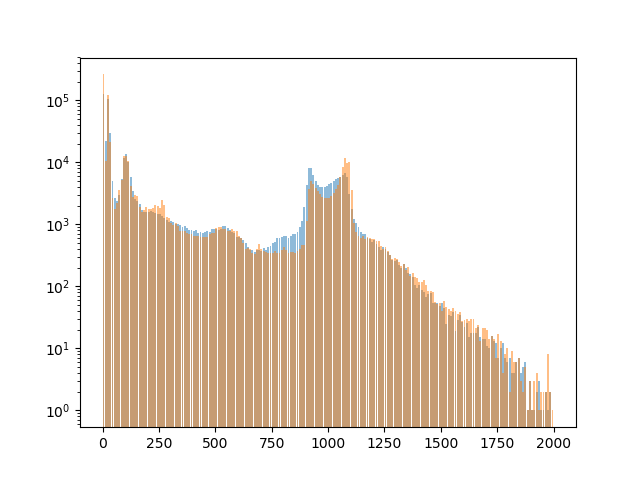

In [12]:
fake_index=2
fake = get_image(fake_images,fake_index)
min_arg, min_mse, mse = find_closest(fake_images[fake_index,0,...], f)
real = np.asarray(get_closest(f, min_arg))
#hist, _ = np.histogram(im1)
plt.figure()
_ = plt.hist(x=fake.flatten(), bins=200, range=(-1,2000), alpha=0.5, rwidth=0.85)
_ = plt.hist(x=real.flatten(), bins=200, range=(-1,2000), alpha=0.5, rwidth=0.85)
plt.yscale('log')

### Histogram of 100 fake images compared to 100 random real images

In [13]:
fakes = np.stack([get_image(fake_images, fake_index) for fake_index in range(0,len(fake_images))])
reals = np.stack(f[list(f.keys())[index]] for index in range(0,len(fake_images)))
print(fakes.shape)
print(reals.shape)

/sw/arch/Debian10/EB_production/2019/software/IPython/7.2.0-foss-2019b-Python-3.6.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (yield from self.run_code(code, result)):


(100, 40, 128, 128)
(100, 40, 128, 128)


<IPython.core.display.Javascript object>


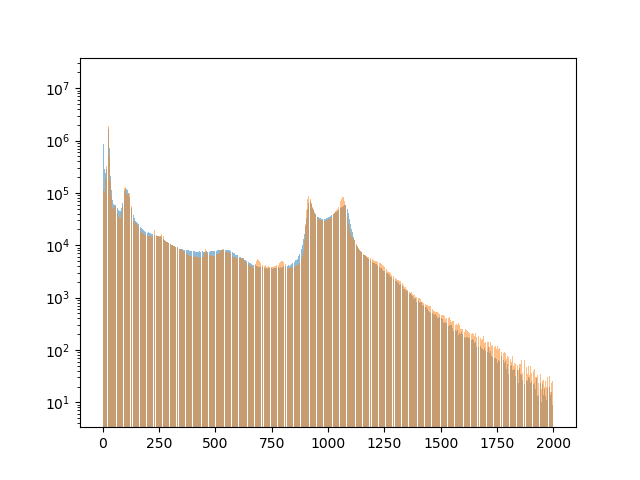

In [14]:
plt.figure()
_ = plt.hist(x=fakes.flatten(), bins=2000, range=(-1,2000), alpha=0.5, rwidth=0.85)
_ = plt.hist(x=reals.flatten(), bins=2000, range=(-1,2000), alpha=0.5, rwidth=0.85)
plt.yscale('log')

### Histogram of 10 fake images compared to 10 closest real images

In [15]:
fakes = np.stack([get_image(fake_images, fake_index) for fake_index in range(0,len(fake_images))])
reals = np.stack([get_closest(f, find_closest(fakes[fake_index], f)[0]) for fake_index in range(0,len(fake_images))])
print(fakes.shape)
print(reals.shape)

(100, 40, 128, 128)
(100, 40, 128, 128)


<IPython.core.display.Javascript object>


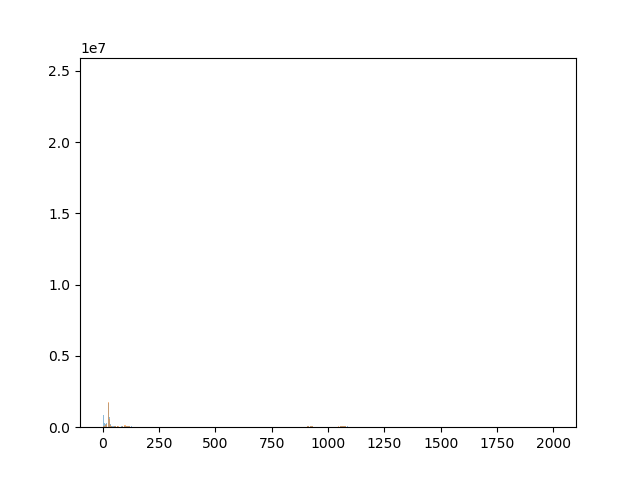

In [16]:
plt.figure()
_ = plt.hist(x=fakes.flatten(), bins=2000, range=(-1,2000), alpha=0.5, rwidth=0.85)
_ = plt.hist(x=reals.flatten(), bins=2000, range=(-1,2000), alpha=0.5, rwidth=0.85)
#plt.yscale('log')